In [138]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.utils as utils
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [139]:
jobseeker = pd.read_csv('/content/jobseeker.csv')
jobseeker.head(5)

,id,nama,alamat,pendidikan,pengalaman,pengalaman_tahun,keterampilan,peminatan
0,1,Devi Laksita,KABUPATEN BATU BARA,SMP,Retail dan Dagang,3,Inovasi,Pariwisata
1,2,Maryadi Damanik,KABUPATEN ACEH TIMUR,SD,Freelance,3,Komunikasi,Pekerjaan Lepas
2,3,Harsana Puspasari,KABUPATEN BANTUL,SMP,Teknologi,3,Pemasaran,Tidak Ada Pengalaman
3,4,Banawi Pratiwi,KABUPATEN ENREKANG,SMP,Retail dan Dagang,3,Teknologi Informasi,Teknik
4,5,Karen Waskita,KABUPATEN PUNCAK,S1/D4,Pekerjaan Lepas,2,Adaptasi,Teknik


In [140]:
#menghapus spasi di depan kolom
jobseeker.columns = jobseeker.columns.str.strip()

In [141]:
# Fungsi untuk menentukan nilai label berdasarkan peminatan dan keterampilan
def assign_label(row):
    if row['peminatan'] in ['Freelance', 'Pariwisata', 'Retail dan Dagang', 'Teknologi'] and row['keterampilan'] in ['Mengembangkan Jaringan', 'Pemasaran', 'Penjualan', 'Kepemimpinan', 'Pemasaran']:
        return 'Pelayanan'
    elif row['peminatan'] in ['Pariwisata', 'Freelance', 'Teknik'] and row['keterampilan'] in ['Inovasi', 'Komunikasi', 'Adaptasi', 'Kepemimpinan']:
        return 'Pariwisata'
    elif row['peminatan'] in ['Teknik', 'Teknologi', 'Retail dan Dagang', 'Teknologi'] and row['keterampilan'] in ['Adaptasi', 'Komunikasi', 'Pemasaran']:
        return 'Pekerja Lepas'
    elif row['peminatan'] in ['Teknologi', 'Teknik', 'Freelance'] and row['keterampilan'] in ['Mengembangkan Jaringan', 'Manajemen', 'Teknologi Informasi']:
        return 'Teknik'
    elif row['peminatan'] in ['Pekerjaan Lepas', 'Pelayanan'] and row['keterampilan'] in ['Adaptasi', 'Manajemen']:
        return 'Freelance'
    elif row['peminatan'] in ['Tidak Ada Pengalaman', 'Pariwisata'] and row['keterampilan'] in ['Adaptasi', 'Komunikasi',]:
        return 'Pariwisata'
    elif row['peminatan'] in ['Pekerja Lepas', 'Tidak Ada Pengalaman', 'Freelance'] and row['keterampilan'] in ['Keuangan', 'Manajemen', 'Adaptasi', 'Pemasaran']:
        return 'Retail dan Dagang'
    else:
        return 'Teknologi'

# Tambahkan kolom label berdasarkan kriteria
jobseeker['label'] = jobseeker.apply(assign_label, axis=1)

# Tampilkan dataset dengan kolom label baru
print(jobseeker)

       id                 nama                    alamat pendidikan  \
0       1         Devi Laksita       KABUPATEN BATU BARA        SMP   
1       2      Maryadi Damanik      KABUPATEN ACEH TIMUR         SD   
2       3    Harsana Puspasari          KABUPATEN BANTUL        SMP   
3       4       Banawi Pratiwi        KABUPATEN ENREKANG        SMP   
4       5        Karen Waskita          KABUPATEN PUNCAK      S1/D4   
..    ...                  ...                       ...        ...   
995   996     Among Laksmiwati       KABUPATEN MANOKWARI         SD   
996   997       Galih Dongoran    KABUPATEN SUMBA TENGAH    SMA/SMK   
997   998  Bakianto Zulkarnain  KABUPATEN SORONG SELATAN        SMP   
998   999     Jaswadi Lazuardi    KABUPATEN LOMBOK BARAT        SMP   
999  1000     Nabila Oktaviani     KABUPATEN KULON PROGO         SD   

            pengalaman  pengalaman_tahun            keterampilan  \
0    Retail dan Dagang                 3                 Inovasi   
1          

In [142]:
# Memisahkan fitur (X) dan label (y)
X = jobseeker[['peminatan', 'keterampilan']]
y = jobseeker['label']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan
print("Data Latih:")
print(X_train)
print(y_train)
print("Data Uji:")
print(X_test)
print(y_test)

Data Latih:
                peminatan         keterampilan
29             Pariwisata            Pemasaran
535             Teknologi             Adaptasi
695             Freelance             Adaptasi
557             Teknologi            Penjualan
836                Teknik             Keuangan
..                    ...                  ...
106            Pariwisata             Keuangan
270       Pekerjaan Lepas  Teknologi Informasi
860                Teknik             Adaptasi
435  Tidak Ada Pengalaman             Keuangan
102     Retail dan Dagang              Inovasi

[800 rows x 2 columns]
29             Pelayanan
535        Pekerja Lepas
695           Pariwisata
557            Pelayanan
836            Teknologi
             ...        
106            Teknologi
270            Teknologi
860           Pariwisata
435    Retail dan Dagang
102            Teknologi
Name: label, Length: 800, dtype: object
Data Uji:
             peminatan      keterampilan
521  Retail dan Dagang          Ad

In [143]:
# Menggunakan LabelEncoder untuk mengonversi kolom target menjadi nilai numerik
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Menggunakan One-Hot Encoding untuk mengonversi fitur kategorikal
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X_train_encoded = column_transformer.fit_transform(X_train)

# Membuat instance Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Melatih model dengan data yang telah diencode
dt_classifier.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier()

In [144]:
# Mengonversi label pada data uji menggunakan LabelEncoder
y_test_encoded = label_encoder.transform(y_test)

# Mengonversi fitur pada data uji menggunakan ColumnTransformer
X_test_encoded = column_transformer.transform(X_test)

# Definisikan model klasifikasi menggunakan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih model dengan data yang telah diencode
model.fit(X_train_encoded, y_train_encoded, epochs=10, batch_size=32)

# Evaluasi model pada data uji yang telah diencode
_, accuracy = model.evaluate(X_test_encoded, y_test_encoded)

# Print akurasi model
print("Akurasi model:", accuracy)

# Melakukan prediksi pada data pelatihan
y_train_pred = dt_classifier.predict(X_train_encoded)

# Menghitung matriks kebingungan
cm = confusion_matrix(y_train_encoded, y_train_pred)
print("Confusion Matrix:")
print(cm)


Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 1.7553 - accuracy: 0.4675
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 1.4016 - accuracy: 0.4787
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 1.1230 - accuracy: 0.6250
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.8633 - accuracy: 0.8025
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.8300
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8600
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.9162
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9775
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.9875
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9700
Akurasi model: 0.9700

In [145]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test_encoded)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Menghitung akurasi
accuracy = accuracy_score(y_test_encoded, y_pred_classes)

# Menghitung presisi
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')

# Menghitung recall
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')

# Menghitung f1-score
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

print("Confusion Matrix:")
print(cm)
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)


7/7 [==============================] - 0s 2ms/step
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  2  8  0  0  0  0]
 [ 0  0  0 36  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 23  0]
 [ 4  0  0  0  0  0 85]]
Akurasi: 0.97
Presisi: 0.9751196172248804
Recall: 0.97
F1-score: 0.9706291252133038


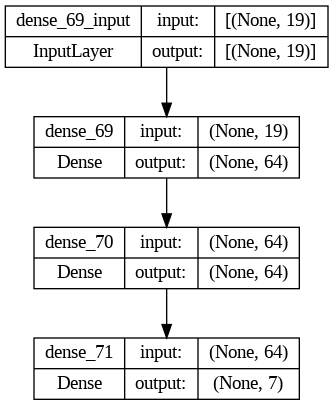

In [146]:
# Visualisasi arsitektur model Sequential
utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)

Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0870 - accuracy: 0.9975 - val_loss: 0.1150 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 11ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 8/10
25/25 [=

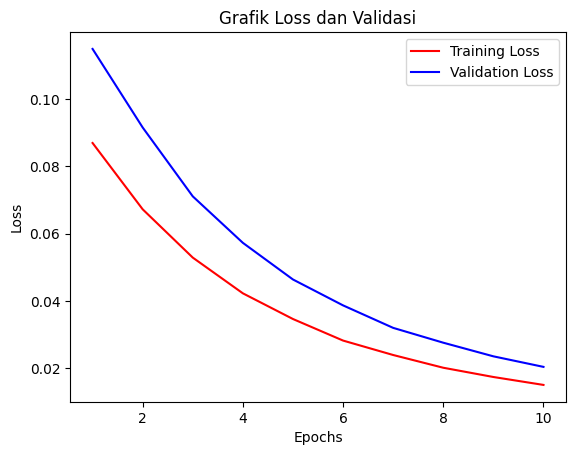

In [147]:
# Latih model dengan metrik validasi
history = model.fit(X_train_encoded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_encoded, y_test_encoded))

# Melihat grafik loss dan validasi
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Grafik Loss dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [148]:
# Menyimpan model dalam file pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Mengambil model dari file pickle
loaded_model = pickle.load(open(filename, 'rb'))